In [158]:
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
import seaborn as sns

%matplotlib inline
sns.set_style(style="darkgrid")
# plt.rcParams['figure.figsize'] = [12.0, 8.0]   # make plots size, double of the notebook normal
plt.rcParams['figure.figsize'] = [9.0, 6.0]   # make plots size, double of the notebook normal

from IPython.display import display, HTML      # to use display() to always have well formatted html table output

## Dataset Description

| Variable Name | Definition                                                          	 |
|-------------	|---------------------------------------------------------------------	 |
| PassengerId 	| A unique ID to each Passenger; **1-891**                               |
| Survived    	| A boolean variable; **1 - Survived, 0 - Dead**                         |
| Pclass      	| Ticket Class; **1 - 1st, 2 - 2nd, 3 - 3rd class**                      |
| Name        	| Passenger Name                                                      	 |
| Sex         	| Sex of Passenger                                                    	 |
| Age         	| Age in Years                                                        	 |
| SibSp       	|  Number of Siblings / Spouses Aboard                                	 |
| Parch       	| Number of parents / children aboard the titanic                     	 |
| Ticket      	| Ticket number                                                       	 |
| Fare        	| Passenger Fare                                                      	 |
| Cabin       	| Cabin number                                                        	 |
| Embarked    	| Port of Embarkation; **C - Cherbourg, Q - Queenstown, S - Southampton**|
<br/>
### Some Notes Regarding Dataset
**Pclass**: A proxy for socio-economic status (SES)
<br/>1st = Upper
<br/>2nd = Middle
<br/>3rd = Lower
<br/><br/>
**Age**: Age is fractional if less than 1. If the age is estimated, is it in the form of xx.5
<br/><br/>
**SibSp**: The dataset defines family relations in this way...
<br/>Sibling = brother, sister, stepbrother, stepsister
<br/>Spouse = husband, wife (mistresses and fiancés were ignored)
<br/><br/>
**Parch**: The dataset defines family relations in this way...
<br/>Parent = mother, father
<br/>Child = daughter, son, stepdaughter, stepson
<br/>Some children travelled only with a nanny, therefore parch=0 for them.
<br/><br/>
<p style="text-align:center">*Source: [Kaggle's - Titanic: Machine Learning from Disaster](https://www.kaggle.com/c/titanic/data)*</p>
<br/><br/>

## Loading data & Preview

In [159]:
titanic_df = pd.read_csv("titanic-data.csv", index_col=["PassengerId"])
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [160]:
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         714 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


Dataset summary above shows that there are 891 entries.

**However, from above we can also see that we have missing values in - Age, Cabin, Embarked columns.**

**Missing values will be dealt as and when required in analysis process.**

In [161]:
titanic_df.describe()

,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


From the above we notice
* Oldest passenger was 80 years old
* Youngest passenger was about 5 months old
* Average age of passengers was 29.32 - but note this also has missing ages
* Mean survival is 0.3838
* Max fare charged was $512.33

## Questions in mind

1. Did passenger class made any difference to his survival?
2. Which gender had more survival?
3. Person travelling with others had more survival possibility?
4. Which age group had better chance of survival?

## Question 1 - Did passenger class made any difference to his survival?

In [162]:
## SUBSET DATAFRAME TO JUST THE REQUIRED DATA

survived_plass_df = titanic_df[['Survived', 'Pclass']]          # works - just have to say the columns required
survived_plass_df.head()

## GROUP DATA TO CALCULATE SURVIVED & TOTAL BY PCLASS

## calculate survived by pclass
survived_by_pclass = survived_plass_df.groupby(['Pclass']).sum()
total_by_pclass = survived_plass_df.groupby(['Pclass']).count()

# total are showed as survived - so change to column name Total
total_by_pclass.rename(columns = {'Survived':'Total'}, inplace = True)

# merge separate data into one dataframe
survived_total_by_pclass = pd.merge(survived_by_pclass, total_by_pclass, left_index=True, right_index=True) # merge by index
survived_total_by_pclass

,Survived,Total
Pclass,,
1,136,216
2,87,184
3,119,491


In [163]:
percent_survived = (survived_total_by_pclass['Survived'] / survived_total_by_pclass['Total']) * 100
survived_total_by_pclass['Percentage'] = percent_survived

survived_total_by_pclass

,Survived,Total,Percentage
Pclass,,,
1,136,216,62.962963
2,87,184,47.282609
3,119,491,24.236253


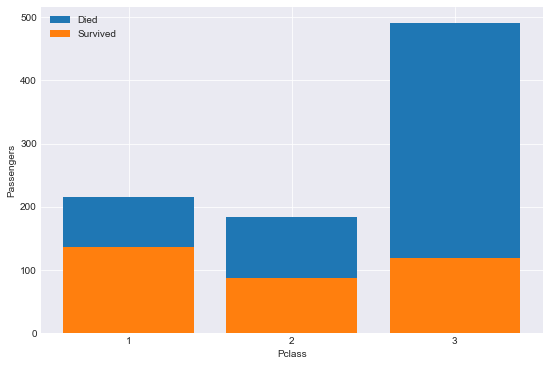

In [164]:
x = survived_total_by_pclass.index.values
ht = survived_total_by_pclass.Total
hs = survived_total_by_pclass.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, x)
plt.xlabel('Pclass')
plt.ylabel('Passengers')


plt.legend([pht,phs],['Died', 'Survived'])

**Conclusion**

As can be seen from the visualization and also from the dataframe table above - 1st Class passengers had highest rate of survival, then 2nd class passengers, and the least survival rates was of 3rd class passengers. A large number of passengers were travelling in 3rd class (491), but only 24.24% survived.

## Question 2 - Which gender had more survival?

In [165]:
## CALCULATE SURVIVED AND TOTAL BY SEX

# groupby Sex
group_by_sex = titanic_df.groupby('Sex')

# calculate survived by sex
survived_by_sex = group_by_sex['Survived'].sum()
survived_by_sex.name = 'Survived'
display(survived_by_sex)

# calculate total by sex
total_by_sex = group_by_sex['Survived'].size()
total_by_sex.name = 'Total'
display(total_by_sex)

# concat the separate results into one dataframe
survived_total_by_sex = pd.concat([survived_by_sex, total_by_sex], axis=1)
survived_total_by_sex

Sex
female    233
male      109
Name: Survived, dtype: int64

Sex
female    314
male      577
Name: Total, dtype: int64

,Survived,Total
Sex,,
female,233,314
male,109,577


In [166]:
percent_survived = (survived_total_by_sex['Survived'] / survived_total_by_sex['Total']) * 100
survived_total_by_sex['Percentage'] = percent_survived

survived_total_by_sex

,Survived,Total,Percentage
Sex,,,
female,233,314,74.203822
male,109,577,18.890815


Now lets visualize it

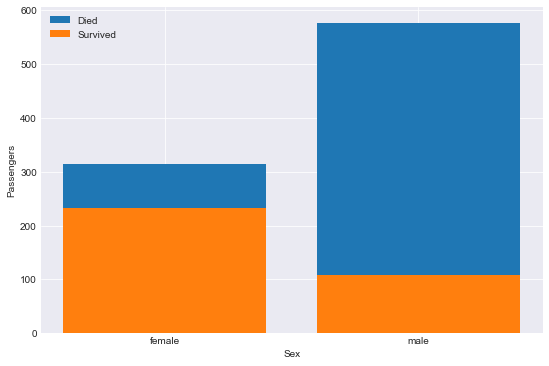

In [167]:
x = range(len(survived_total_by_sex.index.values))
ht = survived_total_by_sex.Total
hs = survived_total_by_sex.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, survived_total_by_sex.index.values)
plt.xlabel('Sex')
plt.ylabel('Passengers')

plt.legend([pht,phs],['Died', 'Survived'])

**Conclusion**

From the visualization and percentage of survival from the dataframe printout above - we can see that females had very high rate of survival. Female survial rate was 74.3%, and male survival rate was 18.9% - so female survival rate was about 4 times that of males.

It can be concluded that females were given preference in rescue operations, and males must have sacrificed themselves to let the females survive.

## Question 3 - Person travelling with others had more survival possibility?

In [168]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [169]:
# is_not_alone = (titanic_df.SibSp > 1) | (titanic_df.Parch > 0)
# travelling_not_alone = titanic_df[is_not_alone]
# travelling_not_alone.head()

In [170]:
# is_alone = (titanic_df.SibSp == 0) & (titanic_df.Parch == 0)
# travelling_alone = titanic_df[is_alone]
# travelling_alone.head()

In [171]:
notalone = np.where((titanic_df.SibSp + titanic_df.Parch) >= 1, 'Not Alone', 'Alone')
loneliness_summary = titanic_df.groupby(notalone, as_index=False)['Survived'].agg([np.sum, np.size])
loneliness_summary = loneliness_summary.rename(columns={'sum':'Survived', 'size':'Total'})

loneliness_summary

,Survived,Total
Alone,163,537
Not Alone,179,354


In [172]:
loneliness_summary['Percent survived'] = (loneliness_summary.Survived / loneliness_summary.Total) * 100

loneliness_summary

,Survived,Total,Percent survived
Alone,163,537,30.353818
Not Alone,179,354,50.564972


Now lets visualize

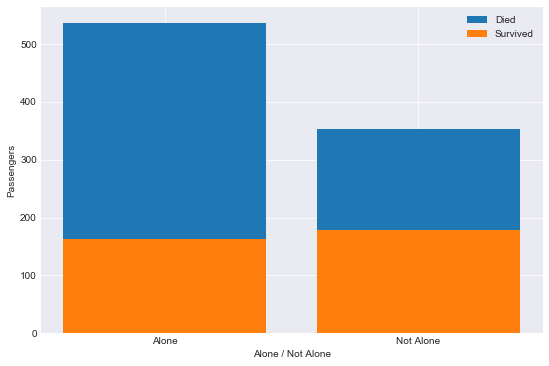

In [173]:
x = range(len(loneliness_summary.index.values))
ht = loneliness_summary.Total
hs = loneliness_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, loneliness_summary.index.values)
plt.xlabel('Alone / Not Alone')
plt.ylabel('Passengers')


plt.legend([pht,phs],['Died', 'Survived'])

**Conclusion**

Percentage above and visualizations above clearly indicate that people having company had higher survival rate.

## Question 4 - Which age group had a better chance of survival?

In [174]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
PassengerId,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


### Fix missing ages

To tackle this question, the issue first we have to deal with is - how to deal with the missing ages.

If we assume that the missing ages will be distributed similarly, to the values that are present - then we can substitue values that represent the existing distribution.

For this we can replace the missing values with the mean.

To have best representative values populated - we will taken mean based on Sex and Pclass.
In other words the mean of ages for Sex within the Pclass, and when replacing the missing age, these two factors will be kept in consideration - to use the related mean of ages.

In [175]:
mean_ages = titanic_df.groupby(['Sex','Pclass'])['Age'].mean()
display(mean_ages)

Sex     Pclass
female  1         34.611765
        2         28.722973
        3         21.750000
male    1         41.281386
        2         30.740707
        3         26.507589
Name: Age, dtype: float64

In [176]:
def replace_nan_age(row):
    if pd.isnull(row['Age']):
        return mean_ages[row['Sex'], row['Pclass']]
    else:
        return row['Age']
    
titanic_df['Age'] = titanic_df.apply(replace_nan_age, axis=1)
titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 891 entries, 1 to 891
Data columns (total 11 columns):
Survived    891 non-null int64
Pclass      891 non-null int64
Name        891 non-null object
Sex         891 non-null object
Age         891 non-null float64
SibSp       891 non-null int64
Parch       891 non-null int64
Ticket      891 non-null object
Fare        891 non-null float64
Cabin       204 non-null object
Embarked    889 non-null object
dtypes: float64(2), int64(4), object(5)
memory usage: 83.5+ KB


From the above we can see that the missing ages have been filled.

In [177]:
def age_group(age):
    if age >= 80:
        return '80-89'
    if age >= 70:
        return '70-79'
    if age >= 60:
        return '60-69'
    if age >= 50:
        return '50-59'
    if age >= 40:
        return '40-49'
    if age >= 30:
        return '30-39'
    if age >= 20:
        return '20-29'
    if age >= 10:
        return '10-19'
    if age >= 0:
        return '0-9'
    
titanic_df['AgeGroup'] = titanic_df.Age.apply(age_group)
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [178]:
age_group_summary = titanic_df.groupby(['AgeGroup'], as_index=False)['Survived'].agg([np.sum, np.size])
age_group_summary = age_group_summary.rename(columns={'sum':'Survived', 'size':'Total'})
age_group_summary

,Survived,Total
AgeGroup,,
0-9,38,62
10-19,41,102
20-29,113,358
30-39,84,185
40-49,39,110
50-59,20,48
60-69,6,19
70-79,0,6
80-89,1,1


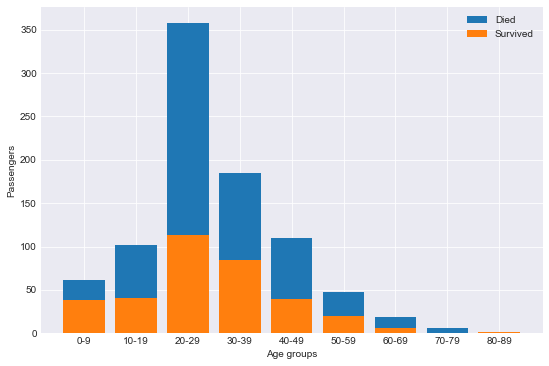

In [179]:
x = range(len(age_group_summary.index.values))
ht = age_group_summary.Total
hs = age_group_summary.Survived

pht = plt.bar(x, ht)
phs = plt.bar(x, hs)

plt.xticks(x, age_group_summary.index.values)
plt.xlabel('Age groups')
plt.ylabel('Passengers')


plt.legend([pht,phs],['Died', 'Survived'])

In [180]:
age_group_summary['SurvivedPercent'] = (age_group_summary.Survived / age_group_summary.Total) * 100
age_group_summary['DiedPercent'] = ((age_group_summary.Total - age_group_summary.Survived) / age_group_summary.Total) * 100
age_group_summary

,Survived,Total,SurvivedPercent,DiedPercent
AgeGroup,,,,
0-9,38,62,61.290323,38.709677
10-19,41,102,40.196078,59.803922
20-29,113,358,31.564246,68.435754
30-39,84,185,45.405405,54.594595
40-49,39,110,35.454545,64.545455
50-59,20,48,41.666667,58.333333
60-69,6,19,31.578947,68.421053
70-79,0,6,0.000000,100.000000
80-89,1,1,100.000000,0.000000


From the above visualization and percentages we can see that most survivors were from 20-29 age group.

But interestingly survival percentage of 0-9 age group is best - at 61.29%.

Also above we have seen that female had better survial rate - so these survial rates must be mix of male and female survival rates - and hence to have better view, the gender aspect should also be taken into consideration.

In [181]:
sex_agegroup_summary = titanic_df.groupby(['Sex','AgeGroup'], as_index=False)['Survived'].mean()

sex_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496


In [182]:
male_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'male']

male_agegroup_summary

,Sex,AgeGroup,Survived
7,male,0-9,0.593750
8,male,10-19,0.122807
9,male,20-29,0.140496
10,male,30-39,0.215517
11,male,40-49,0.217949
12,male,50-59,0.133333
13,male,60-69,0.133333
14,male,70-79,0.000000
15,male,80-89,1.000000


In [183]:
female_agegroup_summary = sex_agegroup_summary[sex_agegroup_summary['Sex'] == 'female']

female_agegroup_summary

,Sex,AgeGroup,Survived
0,female,0-9,0.633333
1,female,10-19,0.755556
2,female,20-29,0.681034
3,female,30-39,0.855072
4,female,40-49,0.687500
5,female,50-59,0.888889
6,female,60-69,1.000000


In [184]:
age_group = titanic_df.AgeGroup.unique()
age_labels = sorted(age_group)
print age_labels

male_age_group = male_agegroup_summary.AgeGroup.unique()
# print male_age_group
male_age_labels = sorted(male_age_group)
print male_age_labels

female_age_group = female_agegroup_summary.AgeGroup.unique()
female_age_labels = sorted(female_age_group)
print female_age_labels

['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79', '80-89']
['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69']


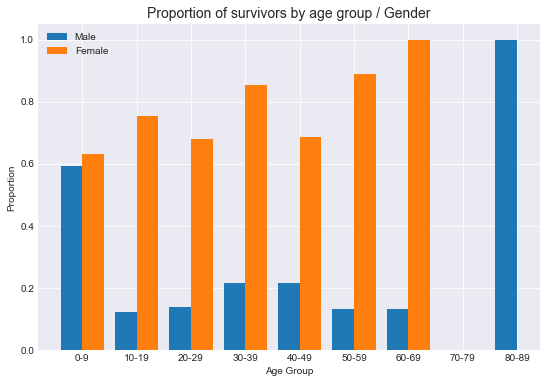

In [185]:
male_data = male_agegroup_summary.Survived
female_data = female_agegroup_summary.Survived

ax = plt.subplot()

width = 0.4

male_plt_position = np.array(range(len(male_age_labels)))
female_plt_position = np.array(range(len(female_age_labels))) + width

tick_spacing = np.array(range(len(age_labels)))+0.2

# print male_plt_position
# print female_plt_position

ax.bar(male_plt_position, male_data,width=width,label='Male')
ax.bar(female_plt_position, female_data,width=width,label='Female')
plt.xticks(tick_spacing,  age_labels)
ax.set_ylabel("Proportion")
ax.set_xlabel("Age Group")
ax.set_title("Proportion of survivors by age group / Gender",fontsize=14)
plt.legend(loc='best')

**Conclusion**

From the proportions above, and the visualization, taking into consideration the gender and age group - it is clearly visible that female and children were given preference in rescue operations by the other male passengers. 0-9 age group both male and female children had very high rate of survival.

## Overall Conclusion

* Female survial rate was 74.3%, and male survival rate was 18.9% - so female survival rate was about 4 times that of males. Hence, female and children were given preference in rescue operations, and must have been saved by other male passengers.

* 62.96 percent of 1st class passengers survived, whereas 3rd class passengers survival rate was 24.24% which is about one-third of the first class passengers.
This is surprising that the 1st class passengers have high survival, that is they were given preference because of their social class.

* 50% of passengers travelling with family survived, whereas survival percentage was 30% for those travelling alone. Hence survival rate was high for passengers travelling with family, as compared to those travelling alone.

* Children had higer rate of survival as compared to adults

## References
* [Methods for handling missing values | Cortana Intelligence Gallery](https://gallery.cortanaintelligence.com/Experiment/Methods-for-handling-missing-values-1)

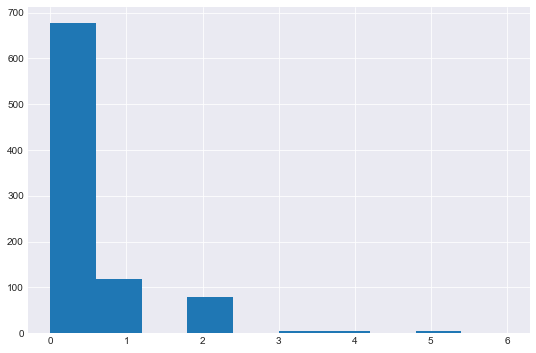

In [186]:
titanic_df.Parch.hist()

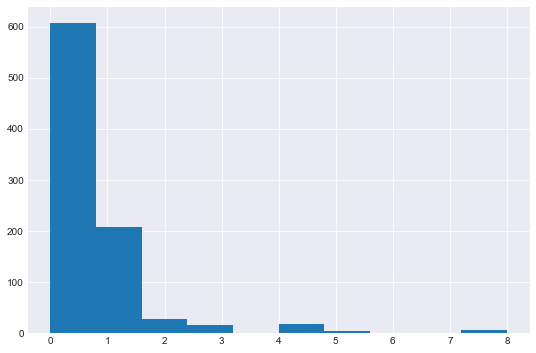

In [187]:
titanic_df.SibSp.hist()

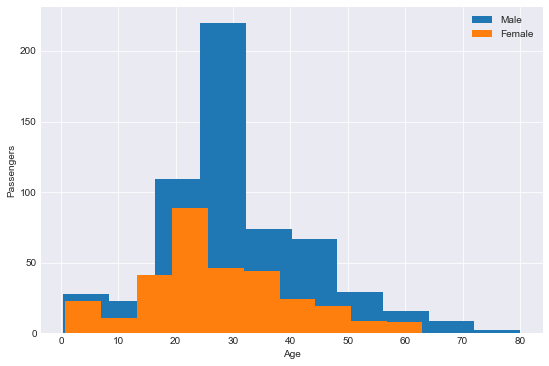

In [188]:
(titanic_df[titanic_df.Sex == 'male'])['Age'].hist(label='Male')
(titanic_df[titanic_df.Sex == 'female'])['Age'].hist(label='Female')
plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc='best')

In [189]:
is_not_alone = (titanic_df.SibSp + titanic_df.Parch) >= 1
passengers_not_alone = titanic_df[is_not_alone]

is_alone = (titanic_df.SibSp + titanic_df.Parch) == 0
passengers_alone = titanic_df[is_alone]

print('Not alone - describe')
display(passengers_not_alone.describe())
print('Alone - describe')
display(passengers_alone.describe())

Not alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,354.000000,354.000000,354.000000,354.000000,354.000000,354.000000
mean,0.505650,2.169492,26.316614,1.316384,0.960452,48.832275
std,0.500676,0.864520,14.901225,1.420774,1.039512,55.307615
min,0.000000,1.000000,0.420000,0.000000,0.000000,6.495800
25%,0.000000,1.000000,17.000000,1.000000,0.000000,18.000000
50%,1.000000,2.000000,26.000000,1.000000,1.000000,27.750000
75%,1.000000,3.000000,36.000000,1.000000,2.000000,59.044800
max,1.000000,3.000000,70.000000,8.000000,6.000000,512.329200


Alone - describe


,Survived,Pclass,Age,SibSp,Parch,Fare
count,537.000000,537.000000,537.000000,537.0,537.0,537.000000
mean,0.303538,2.400372,31.297634,0.0,0.0,21.242689
std,0.460214,0.804511,11.694910,0.0,0.0,42.223510
min,0.000000,1.000000,5.000000,0.0,0.0,0.000000
25%,0.000000,2.000000,23.000000,0.0,0.0,7.775000
50%,0.000000,3.000000,27.000000,0.0,0.0,8.137500
75%,1.000000,3.000000,36.000000,0.0,0.0,15.000000
max,1.000000,3.000000,80.000000,0.0,0.0,512.329200


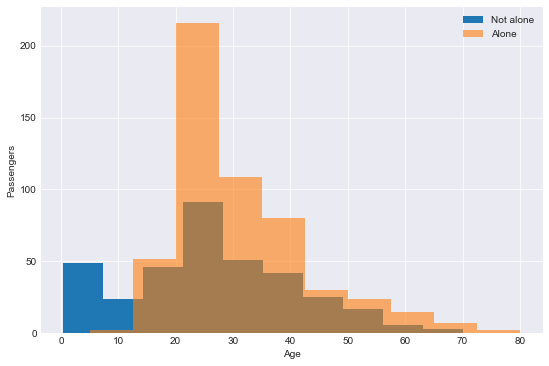

In [190]:
passengers_not_alone.Age.hist(label='Not alone')
passengers_alone.Age.hist(label='Alone', alpha=0.6)

plt.xlabel('Age')
plt.ylabel('Passengers')
plt.legend(loc='best')

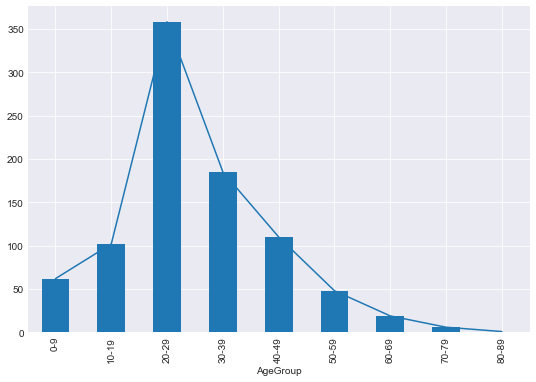

In [191]:
# titanic_df.Age.hist()
# titanic_df.groupby('AgeGroup')['Age'].size()

titanic_df.groupby('AgeGroup').size().plot()
titanic_df.groupby('AgeGroup').size().plot(kind='bar')

In [192]:
titanic_df.head()

,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked,AgeGroup
PassengerId,,,,,,,,,,,,
1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S,20-29
2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C,30-39
3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S,20-29
4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S,30-39
5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S,30-39


In [193]:
def child_or_adult(row):
    if row['Age'] <= 20:
        return 'child'
    else:
        return row['Sex']
    
titanic_df['PersonType'] = titanic_df[['Age', 'Sex']].apply(child_or_adult, axis=1)
# titanic_df.head()

titanic_df.groupby('PersonType').size()

PersonType
child     179
female    237
male      475
dtype: int64

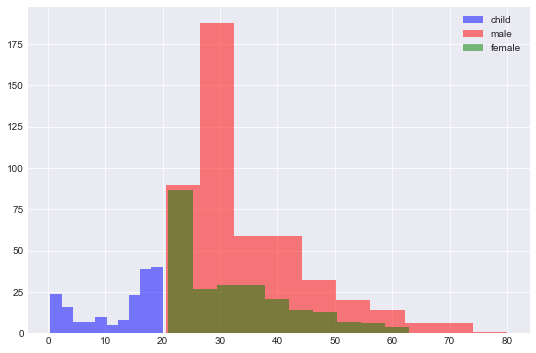

In [194]:
# sns.FacetGrid(titanic_df, hue='PersonType')
is_child = titanic_df.PersonType == 'child'
is_male = titanic_df.PersonType == 'male'
is_female = titanic_df.PersonType == 'female'

children = (titanic_df[is_child]).Age
males = (titanic_df[is_male]).Age
females = (titanic_df[is_female]).Age

# children.plot()
# males.plot()
# children.plot()

children.hist(alpha=0.5, color='b', label='child')
males.hist(alpha=0.5, color='r', label='male')
females.hist(alpha=0.5, color='g', label='female')
plt.legend(loc='best')

In [195]:
def scatter(passengers, marker='o', legend_prefix=''):
    survived = passengers[passengers.Survived == 1]
    died = passengers[passengers.Survived == 0]

    x = survived.Age
    y = survived.Fare
    plt.scatter(x, y, c='blue', alpha=0.5, marker=marker, label=legend_prefix + ' Survived')

    x = died.Age
    y = died.Fare
    plt.scatter(x, y, c='red', alpha=0.5, marker=marker, label=legend_prefix + ' Died')

def scatter_by_sex(pclass):
    class_passengers = titanic_df[titanic_df.Pclass == pclass]
    
    male_passengers = class_passengers[class_passengers.Sex == 'male']
    female_passengers = class_passengers[class_passengers.Sex == 'female']
    
    scatter(male_passengers, marker='o', legend_prefix='Male')
    scatter(female_passengers, marker='^', legend_prefix='Female')

    plt.legend(bbox_to_anchor=(0,1), loc='best') # bbox - to move legend out of plot/scatter
    plt.xlabel('Age')
    plt.ylabel('Fare')
    plt.title('Pclass = ' + str(pclass))

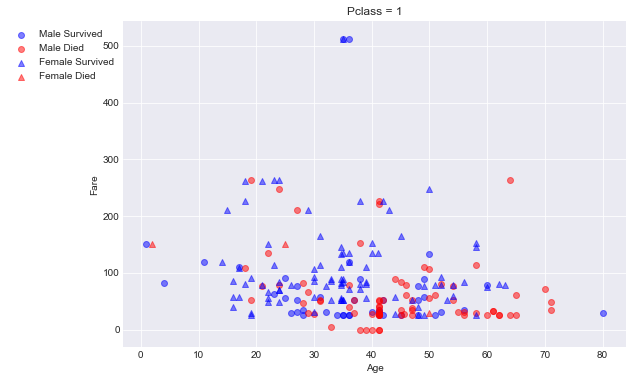

In [196]:
scatter_by_sex(1)

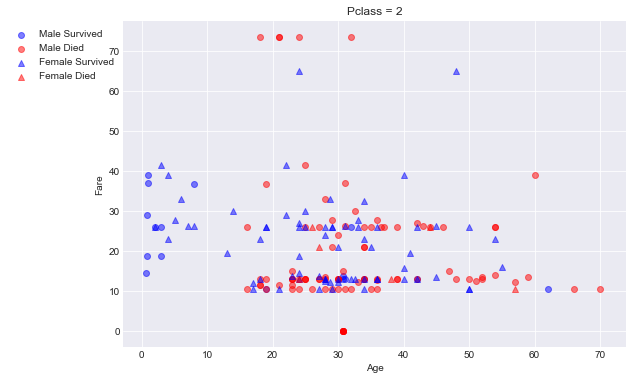

In [197]:
scatter_by_sex(2)

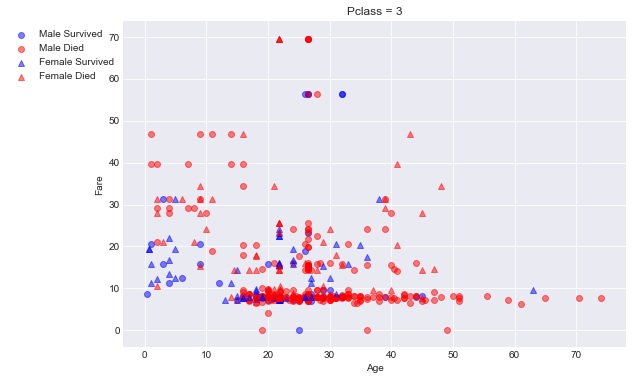

In [198]:
scatter_by_sex(3)